In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm

In [3]:
base = pd.read_csv ("Advertising.csv")
base

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [4]:
print (base.describe())

       Unnamed: 0          TV       radio   newspaper       sales
count  200.000000  200.000000  200.000000  200.000000  200.000000
mean   100.500000  147.042500   23.264000   30.554000   14.022500
std     57.879185   85.854236   14.846809   21.778621    5.217457
min      1.000000    0.700000    0.000000    0.300000    1.600000
25%     50.750000   74.375000    9.975000   12.750000   10.375000
50%    100.500000  149.750000   22.900000   25.750000   12.900000
75%    150.250000  218.825000   36.525000   45.100000   17.400000
max    200.000000  296.400000   49.600000  114.000000   27.000000


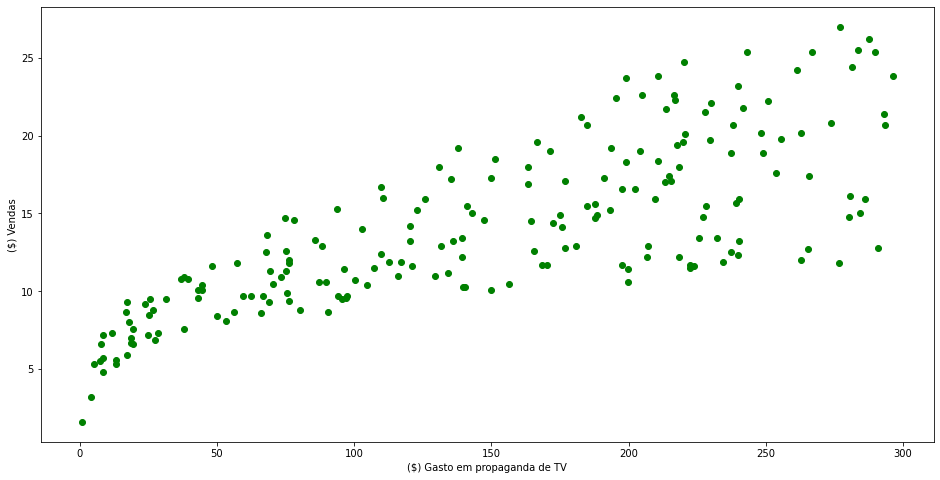

In [16]:
plt.figure (figsize = (16,8))
plt.scatter(
base['TV'],
base['sales'],
c= 'green')
plt.xlabel("($) Gasto em propaganda de TV")
plt.ylabel("($) Vendas")
plt.show()

In [21]:
x = base['TV'].values.reshape(-1,1)
y = base['sales'].values.reshape(-1,1)

reg = LinearRegression()
reg.fit(x,y)

print("O modelo é Vendas: {:.5} + {:.5}x".format(reg.intercept_[0], reg.coef_[0][0]))

O modelo é Vendas: 7.0326 + 0.047537x


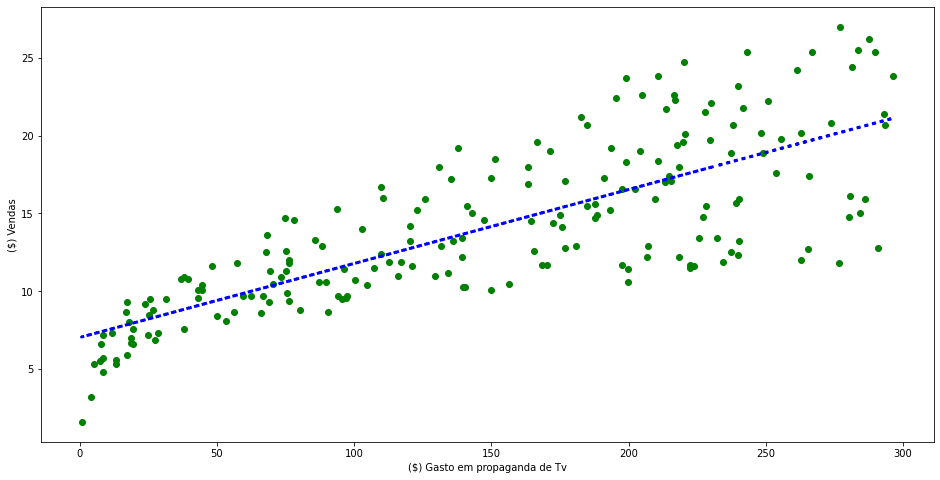

In [25]:
f_previsoes = reg.predict(x)

plt.figure(figsize = (16,8))
plt.scatter(
base['TV'],
base['sales'],
c= 'green')

plt.plot(
base['TV'],
f_previsoes,
c= 'blue',
linewidth=3, 
linestyle=':')
    
plt.xlabel("($) Gasto em propaganda de Tv")
plt.ylabel("($) Vendas")
plt.show()



In [30]:
X = base['TV']
y = base['sales']
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2= est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Wed, 06 Apr 2022   Prob (F-statistic):           1.47e-42
Time:                        14:29:17   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.0

In [38]:
# Regressão Linear Multipla( x = TV, Radio e Jornal)

from sklearn.linear_model import LinearRegression

Xs = base.drop(['sales', 'Unnamed: 0'], axis=1)
y = base['sales'].values.reshape(-1,1)
rl = LinearRegression()
rl.fit(Xs, y)

print("O modelo é: Vendas = {:.5} + {:.5}*TV + {:.5}*radio + {:.5}*newspaper".format(rl.intercept_[0], rl.coef_[0][0], rl.coef_[0][1], rl.coef_[0][2]))

O modelo é: Vendas = 2.9389 + 0.045765*TV + 0.18853*radio + -0.0010375*newspaper
